# Prestamos Bancarios

El fichero bank-loans.csv contiene información sobre los préstamos de los clientes de un banco. Utilizando la librería Pandas, se pide: 

- Crear un DataFrame importando los datos del fichero.
- Mostrar por pantalla el nombre de las columnas del DataFrame. 
- Mostrar por pantalla las filas del DataFrame múltiplos de 10. 
- Mostrar por pantalla el número de clientes casados con edad entre 30 y 40 años. 
- Añadir al DataFrame una columna nueva con la edad en meses. 
- Mostrar por pantalla las frecuencias de los oficios ordenadas de mayor a menor. 
- Mostrar por pantalla las edades medias según el nivel de estudios. 
- Mostrar por pantalla el porcentaje de préstamos hipotecarios (housing) según el estado civil (marital). 
- Dibujar el diagrama de sectores con los porcentajes de los niveles de estudio y ponerle un título. 
- Dibujar en una misma figura el histograma y el diagrama de cajas de las edades. El histograma debe tener clases de amplitud 10 desde 20 hasta 70 años, y en color rojo.



In [1]:
# Importamos pandas

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creacion del dataframe

df = pd.read_csv("bank-loans.csv")
df

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
9995,39,blue-collar,married,basic.4y,unknown,yes,no
9996,36,technician,married,high.school,no,yes,no
9997,33,services,single,basic.6y,no,unknown,unknown
9998,41,technician,married,professional.course,unknown,yes,no


In [3]:
# Mostramos nombre de las columnas

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [4]:
# Mostrar por pantalla las filas del DataFrame múltiplos de 10

df.iloc[range(0, len(df), 10)]

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
10,41,blue-collar,married,unknown,unknown,no,no
20,30,unemployed,married,high.school,no,no,no
30,46,admin.,married,unknown,no,no,no
40,58,management,unknown,university.degree,no,yes,no
...,...,...,...,...,...,...,...
9950,49,blue-collar,married,basic.9y,unknown,no,no
9960,51,unemployed,married,high.school,unknown,yes,no
9970,43,technician,single,professional.course,no,yes,no
9980,49,admin.,divorced,university.degree,no,no,no


In [5]:
# Mostrar por pantalla el número de clientes casados con edad entre 30 y 40 años

len(df[(df.marital == "married") & (df.age > 30) & (df.age < 40)])

2494

In [6]:
# Añadir al DataFrame una columna nueva con la edad en meses

df["months"] = df.age * 12
df

,age,job,marital,education,default,housing,loan,months
0,56,housemaid,married,basic.4y,no,no,no,672
1,57,services,married,high.school,unknown,no,no,684
2,37,services,married,high.school,no,yes,no,444
3,40,admin.,married,basic.6y,no,no,no,480
4,56,services,married,high.school,no,no,yes,672
...,...,...,...,...,...,...,...,...
9995,39,blue-collar,married,basic.4y,unknown,yes,no,468
9996,36,technician,married,high.school,no,yes,no,432
9997,33,services,single,basic.6y,no,unknown,unknown,396
9998,41,technician,married,professional.course,unknown,yes,no,492


In [7]:
# Frecuencias de oficios ordenados de mayor a menor

df.job.value_counts().sort_values(ascending = False)

blue-collar      2980
admin.           2073
technician       1365
services         1172
management        678
entrepreneur      381
self-employed     340
housemaid         297
retired           273
unemployed        236
unknown           125
student            80
Name: job, dtype: int64

In [8]:
# Calcular la edad media según el nivel de estudios

df.groupby("education").age.mean()

education
basic.4y               45.147806
basic.6y               39.448095
basic.9y               39.228571
high.school            38.313602
illiterate             45.000000
professional.course    40.367776
university.degree      39.853485
unknown                43.709278
Name: age, dtype: float64

In [9]:
# Calcular el porcentaje de prestamos hipotecarios según el estado civil

df.groupby("marital").housing.value_counts(normalize = True) * 100

marital   housing
divorced  no         50.940018
          yes        46.821844
          unknown     2.238138
married   no         51.987494
          yes        45.183862
          unknown     2.828644
single    no         51.931131
          yes        44.671940
          unknown     3.396929
unknown   no         64.705882
          yes        35.294118
Name: housing, dtype: float64

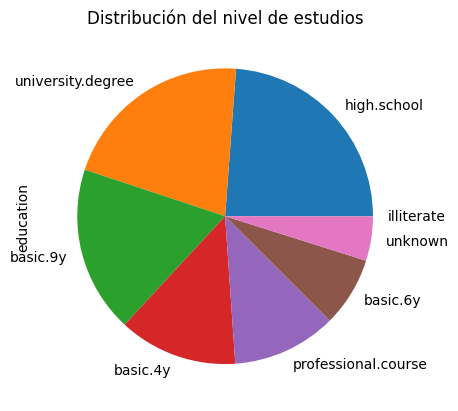

In [10]:
# Diagrama de sectores de nivel de estudios

fig, ax = plt.subplots()
df.education.value_counts(normalize = True).plot(kind = "pie", title = "Distribución del nivel de estudios")
plt.show()

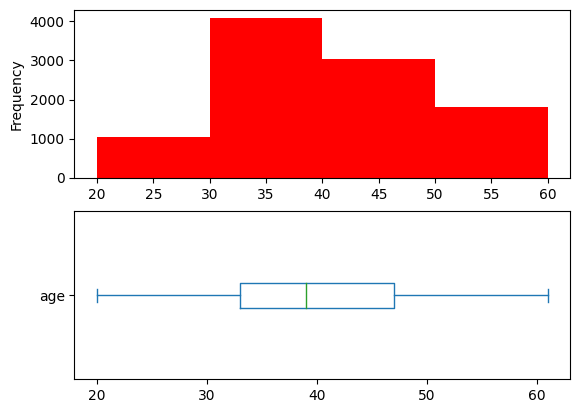

In [11]:
# Histograma y diagrama de cajas de edades

fig, ax = plt.subplots(2)
df.age.plot(kind = "hist", ax = ax[0], bins = range(20, 70,10), color = "red")
df.age.plot(kind = "box", ax = ax[1], vert = False)
plt.show()